<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


***


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


### Visualization: Relationship between `FlightNumber` and `PayloadMass`

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


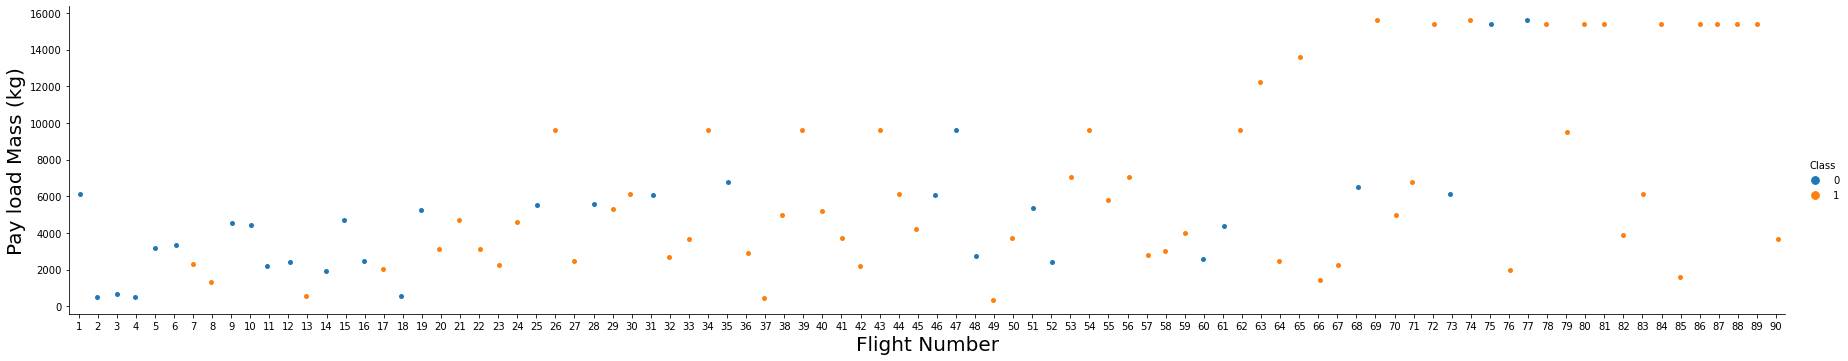

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


### EDA (Personal)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [5]:
df.LandingPad.isnull().value_counts()

False    64
True     26
Name: LandingPad, dtype: int64

In [6]:
df.LandingPad.value_counts()

5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: LandingPad, dtype: int64

In [7]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


#### Insight: Relationship between Outcome and Class

##### Outcome like 'True%' $\propto$ Class like '1'

In [191]:
# Multiple column filters > value_counts() > to_frame() > sort_values()
df[['Outcome', 'Class']].value_counts().to_frame().sort_values('Outcome')

,,0
Outcome,Class,
False ASDS,0,6
False Ocean,0,2
False RTLS,0,1
None ASDS,0,2
None None,0,19
True ASDS,1,41
True Ocean,1,5
True RTLS,1,14


#### Pandas filters

In [188]:
# Filter 2 columns by 1 value
df[['Outcome', 'Class']][df.Outcome == 'True Ocean']

,Outcome,Class
6,True Ocean,1
7,True Ocean,1
12,True Ocean,1
42,True Ocean,1
44,True Ocean,1


In [189]:
# Multiple value filters
df[(df.Outcome == 'True Ocean') & (df.Orbit == 'LEO')]

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
7,8,2014-07-14,Falcon 9,1316.0,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1


In [190]:
# Multiple column and value filters
df[['Outcome', 'LandingPad', 'Class']][(df.Class == 0) & (df.Outcome == 'False ASDS')]

,Outcome,LandingPad,Class
11,False ASDS,5e9e3032383ecb761634e7cb,0
13,False ASDS,5e9e3032383ecb761634e7cb,0
17,False ASDS,5e9e3033383ecbb9e534e7cc,0
18,False ASDS,5e9e3032383ecb6bb234e7ca,0
74,False ASDS,5e9e3032383ecb6bb234e7ca,0
76,False ASDS,5e9e3032383ecb6bb234e7ca,0


In [192]:
# 2 Col 1 Val filter
df[['Outcome', 'Class']][df['Class'] == 0]

,Outcome,Class
0,None None,0
1,None None,0
2,None None,0
3,False Ocean,0
4,None None,0
5,None None,0
8,None None,0
9,None None,0
10,False Ocean,0
11,False ASDS,0


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


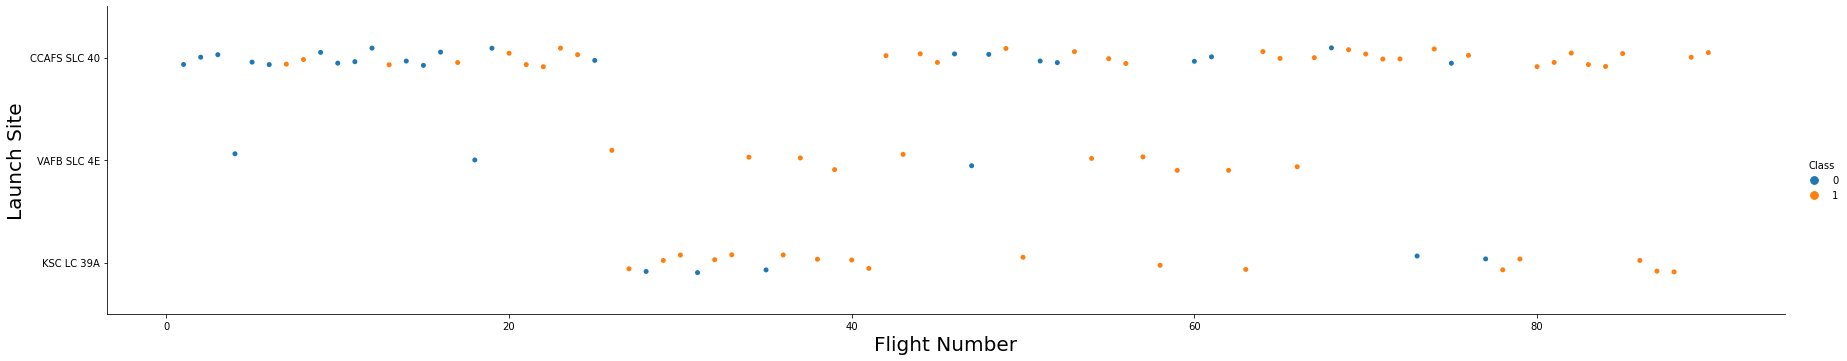

In [364]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y='LaunchSite', x='FlightNumber', hue='Class', data=df, aspect=5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


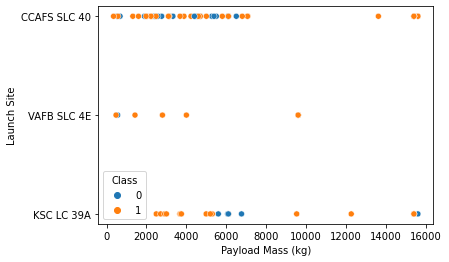

In [26]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
# PayloadMass LaunchSite
# help(sns.scatterplot)
# scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)
sns.scatterplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df)
plt.xlabel('Payload Mass (kg)', fontsize=10)
plt.ylabel('Launch Site', fontsize=10)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [85]:
grouped_df = df[['Orbit', 'Class']].groupby(by=['Orbit'], as_index=False).mean()
grouped_df.sort_values(by='Class', inplace=True, ascending=False)
grouped_df
# sort_values(by, axis: 'Axis' = 0, ascending=True, inplace: 'bool' = False, kind: 'str' = 'quicksort', na_position: 'str' = 'last', ignore_index: 'bool' = False, key: 'ValueKeyFunc' = None)

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
3,HEO,1.000000
9,SSO,1.000000
10,VLEO,0.857143
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
4,ISS,0.619048
2,GTO,0.518519


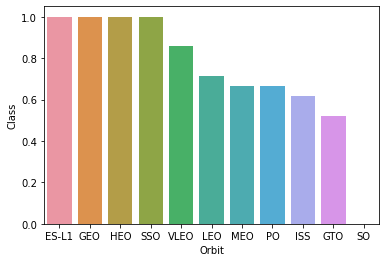

In [86]:
# HINT use groupby method on Orbit column and get the mean of Class column
sns.barplot(x='Orbit', y='Class', data=grouped_df)
plt.show()

# help(sns.barplot)  # barplot
# barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x0000016CFE190EE0>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)

Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


[]

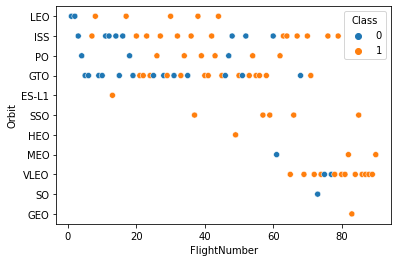

In [97]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
# help(sns.scatterplot)
# scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)
sns.scatterplot(x='FlightNumber', y='Orbit', data=df, hue='Class')
plt.plot()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


[]

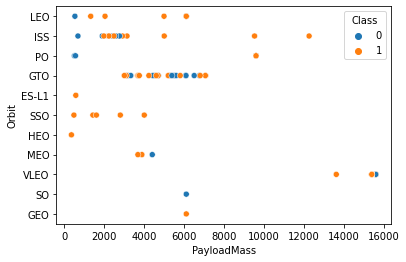

In [107]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
# scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)
sns.scatterplot(x='PayloadMass', y='Orbit', data=df, hue='Class')
plt.plot()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well, as both positive landing rate and negative landing(unsuccessful mission) are both there here.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [109]:
# A function to Extract years from the date
year=[]


def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

C:\Users\arche\AppData\Local\Temp/ipykernel_392/3169752875.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successrate_year_df['Date'] = pd.to_datetime(df['Date'])
C:\Users\arche\AppData\Local\Temp/ipykernel_392/3169752875.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successrate_year_df['Year'] = successrate_year_df['Date'].dt.year


[]

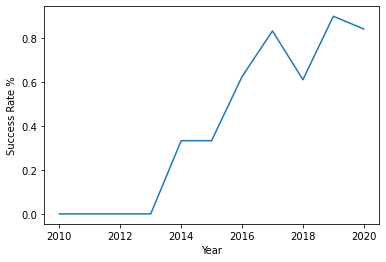

In [194]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
# lineplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='auto', ax=None, **kwargs)
# help(df.apply)  # Apply a function along an axis of the DataFrame.
successrate_year_df = df[['Class']]
successrate_year_df['Date'] = pd.to_datetime(df['Date'])
successrate_year_df['Year'] = successrate_year_df['Date'].dt.year
successrate_year_group_df = successrate_year_df[['Year', 'Class']].groupby(by=['Year'], as_index=False).mean()

sns.lineplot(x='Year', y='Class', data=successrate_year_group_df)
plt.ylabel('Success Rate %')
plt.plot()

you can observe that the sucess rate since 2013 kept increasing till 2020


### EDA Findings

Area/Task | Insight/Relationship
--- | ---
Insight: Relationship between Outcome and Class | Outcome like 'True%' $\propto$ Class like '1' 
Visualization: Relationship between FlightNumber and PayloadMass | FlightNumber $\propto$ PayloadMass increases 
TASK 1: Visualize the relationship between FlightNumber and LaunchSite | For each site, relationship is FlightNumber $\propto$ SuccessRate
TASK 2: Visualize the relationship between PayloadMass and LaunchSite | LaunchSite VAFB SLC: <br>* High SuccessRate <br>* PayloadMass $\propto$ SuccessRate <br>* Only PayloadMass <= 10,000 kg were launched
TASK 3: Visualize the relationship between success rate of each orbit type | * Orbits with high SuccessRate: ES-L1, GEO, HEO, SSO<br>* Orbit SO: SuccessRate == 0
TASK 4: Visualize the relationship between FlightNumber and Orbit type | * Orbit LEO $\propto$ SuccessRate<br>* Low correlation between Orbit GTO and SuccessRate
TASK 5: Visualize the relationship between PayloadMass and Orbit type | * Orbits PO, LEO, ISS: PayloadMass $\propto$ SuccessRate<br>* Orbit GTO: Low correlation between PayloadMass and SuccessRate
TASK 6: Visualize the launch success yearly trend | YEAR $\propto$ SuccessRate

## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [195]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [351]:
features.select_dtypes(exclude='object')

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount
0,1,6104.959412,1,False,False,False,1.0,0
1,2,525.000000,1,False,False,False,1.0,0
2,3,677.000000,1,False,False,False,1.0,0
3,4,500.000000,1,False,False,False,1.0,0
4,5,3170.000000,1,False,False,False,1.0,0
...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,True,True,True,5.0,2
86,87,15400.000000,3,True,True,True,5.0,2
87,88,15400.000000,6,True,True,True,5.0,5
88,89,15400.000000,3,True,True,True,5.0,2


In [357]:
# HINT: Use get_dummies() function on the categorical columns
orbit_one_hot = pd.get_dummies(features['Orbit'])
launch_site_one_hot = pd.get_dummies(features['LaunchSite'])
landing_pad_one_hot = pd.get_dummies(features['LandingPad'])
serial_one_hot = pd.get_dummies(features['Serial'])
features_one_hot = pd.concat(objs=[features.select_dtypes(exclude='object'),
                                   orbit_one_hot,
                                   launch_site_one_hot,
                                   landing_pad_one_hot,
                                   serial_one_hot],
                             axis=1)
print(features_one_hot.info())
# print(features_one_hot.shape)
# features_one_hot.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FlightNumber              90 non-null     int64  
 1   PayloadMass               90 non-null     float64
 2   Flights                   90 non-null     int64  
 3   GridFins                  90 non-null     bool   
 4   Reused                    90 non-null     bool   
 5   Legs                      90 non-null     bool   
 6   Block                     90 non-null     float64
 7   ReusedCount               90 non-null     int64  
 8   ES-L1                     90 non-null     uint8  
 9   GEO                       90 non-null     uint8  
 10  GTO                       90 non-null     uint8  
 11  HEO                       90 non-null     uint8  
 12  ISS                       90 non-null     uint8  
 13  LEO                       90 non-null     uint8  
 14  MEO         

In [337]:
# help(pd.concat)  # append combine join concat
# concat(objs: 'Iterable[NDFrame] | Mapping[Hashable, NDFrame]', axis=0, join='outer', ignore_index: 'bool' = False, keys=None, levels=None, names=None, verify_integrity: 'bool' = False, sort: 'bool' = False, copy: 'bool' = True) -> 'FrameOrSeriesUnion'
#     Concatenate pandas objects along a particular axis with optional set logic
#     along the other axes.

### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [360]:
# Hint: use astype()
features_one_hot = features_one_hot.astype('float64')
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FlightNumber              90 non-null     float64
 1   PayloadMass               90 non-null     float64
 2   Flights                   90 non-null     float64
 3   GridFins                  90 non-null     float64
 4   Reused                    90 non-null     float64
 5   Legs                      90 non-null     float64
 6   Block                     90 non-null     float64
 7   ReusedCount               90 non-null     float64
 8   ES-L1                     90 non-null     float64
 9   GEO                       90 non-null     float64
 10  GTO                       90 non-null     float64
 11  HEO                       90 non-null     float64
 12  ISS                       90 non-null     float64
 13  LEO                       90 non-null     float64
 14  MEO         

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla | Modified markdown       |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |
| 2020-11-10        | 1.1     | Nayef         | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
